## Linear Regression versus the mean of the slopes between all pairs of points

In [1]:
import numpy as np
from scipy.stats import linregress
from __future__ import division
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.array(range(1, 101), dtype=np.float64)
m_true = 3.
b_true = 50.

In [3]:
np.random.seed(314159)
y = m_true*x + np.random.normal(loc=0, scale=20, size=len(x)).astype(int) + b_true
# Add a few outliers
y[5:35:5] += 250
y[70] -= 250
y[80] -= 250
y[90] -= 250

### Simple Linear Regression

In [4]:
m_lr, b_lr, rval, pval, _ = linregress(x, y)
m_lr, b_lr, rval, pval

(2.1875007500750074,
 100.18121212121213,
 0.64738456966585378,
 3.3802424226184269e-13)

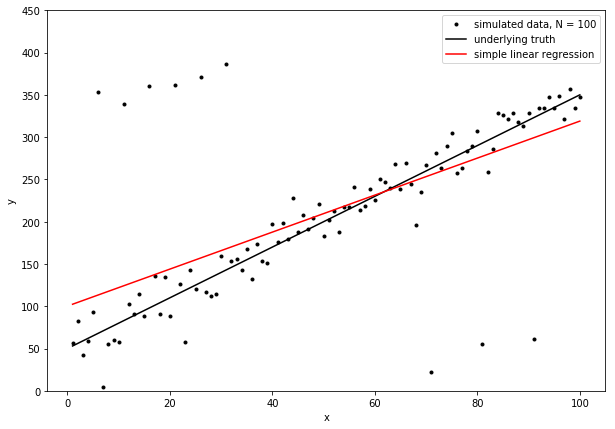

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
plt.plot(x, y, 'k.', 
         x, m_true*x + b_true, 'k-', 
         x, m_lr*x + b_lr, 'r-');
plt.legend(['simulated data, N = %d' % len(x), 
            'underlying truth', 
            'simple linear regression']);
plt.ylim([0, 450])
plt.xlabel('x');
plt.ylabel('y');

### Compute the slopes between all pairs of points

There is a total of N choose 2 = $_N C_2 = N(N-1)/2$ pairs of points within a set of $N$ points. For N = 100, we're looking at 4950 pairs. For convenience, we've simulated our dataset such that no two points ever share the same x-coordinate, eliminating the possibility of infinite slope.

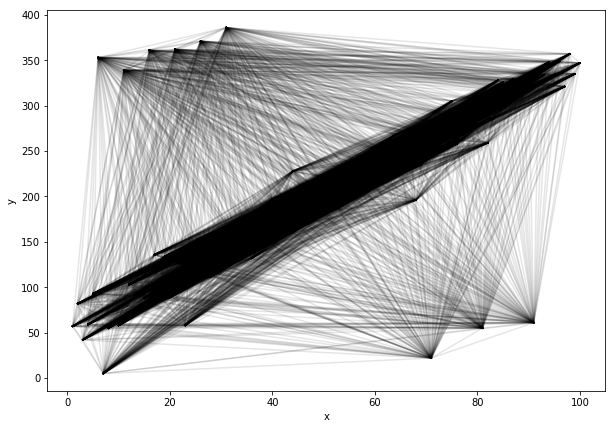

In [6]:
# Working from left to right, pick each point and pair it sequentially with 
# each point *to the right*. This should work
# whether or not our point list is sorted. (In this toy example, 
# our points are in fact sorted by x-coordinate.)
# Let's be fancy and graph each line as well.
# FIXME: the looped calls to ax.plot cause this code to take a minute.
# There's got to be some clever way of zipping and unpacking the datapoints
# into a single call to ax.plot()...

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
plt.xlabel('x')
plt.ylabel('y')
all_slopes = []
for xi, yi in zip(x, y):
    for xj, yj in zip(x[x > xi], y[x > xi]):
        all_slopes.append((yj - yi)/(xj - xi))
        ax.plot([xi, xj], [yi, yj], 'k-', alpha=0.1)

In [7]:
len(all_slopes)

4950

We're about to take the mean of the slopes of lines joining all 4950 distinct pairs of points.

### The *mean* of slopes between all pairs of points

In [8]:
np.mean(all_slopes), np.std(all_slopes)

(2.2910897778509032, 19.954761958101837)

This does not agree terribly well with the simple linear regression result of m = 2.46, so we've settled the main question: **the slope estimate of a simple linear regression is *not* identical to the mean of the slopes between all pairs of points.**

### The *median* of slopes between all pairs of points, AKA the Thiel-Sen estimator

In [9]:
m_ts = np.median(all_slopes)
m_ts

2.9090909090909092

As expected, Thiel-Sen is more robust against outliers than simple linear regression.

### Compute Thiel-Sen y-intercept

In [10]:
b_ts = np.median(y - m_ts * x)
b_ts

58.409090909090907

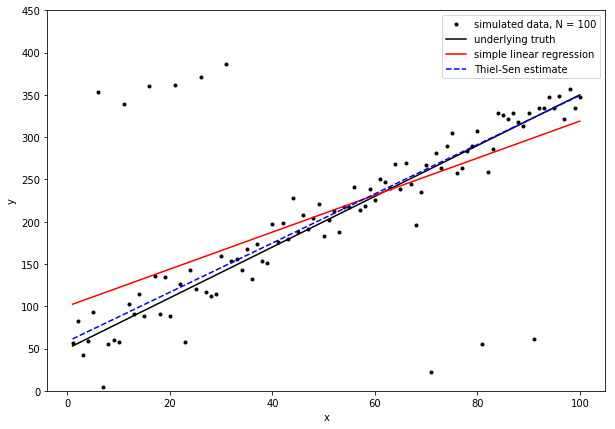

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
plt.plot(x, y, 'k.', 
         x, m_true*x + b_true, 'k-', 
         x, m_lr*x + b_lr, 'r-',
         x, m_ts*x + b_ts, 'b--');
plt.legend(['simulated data, N = %d' % len(x), 
            'underlying truth', 
            'simple linear regression',
            'Thiel-Sen estimate']);
plt.ylim([0, 450])
plt.xlabel('x');
plt.ylabel('y');